<a href="https://colab.research.google.com/github/rghimre3/INFO5505_Machine_Learning_for_Data_Scientist/blob/main/Ghimire_Ramesh_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Clustering (Assignment 3)

Ramesh Ghimire

INFO 5505

Amyotrophic Lateral Sclerosis (ALS) Case-Study Cluster analysis:
Use the attached datasets, 15_ALS_CaseStudy_Docs.docx Download 15_ALS_CaseStudy_Docs.docx, ALS_PROACT_DataDictionary.pdf Download ALS_PROACT_DataDictionary.pdf, ALS_TestingData_78.csv Download ALS_TestingData_78.csv, ALS_TrainingData_2223.csvDownload ALS_TrainingData_2223.csv

This case-study examines the patterns, symmetries, associations and causality in a rare but devastating disease, amyotrophic lateral sclerosis (ALS). A major clinically relevant question in this biomedical study is: What patient phenotypes can be automatically and reliably identified and used to predict the change of the ALSFRS slope over time?. This problem aims to explore the data set by unsupervised learning (you only need to work on K mean in this assignment).

Load and prepare the data.

Perform summary and preliminary visualization (i.e. show the clustering with selected features).

Train a k-Means model on the data with selected features (3 or more), experiment at least two different k values, and explain which k value is a better choice.

Evaluating the model performance by report the center of clusters.

Visualize the final clustering result.
Submit Python code, report that explains the k experiment, performance evaluation, and visualizations. 

 

Ref: http://www.socr.umich.edu/people/dinov/2017/Spring/DSPA_HS650/notes/12_kMeans_Clustering_Assignment.htmlLinks to an external site.

In [ ]:

import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split

from sklearn.decomposition import PCA
from sklearn.datasets import make_blobs

from sklearn.cluster import KMeans


In [ ]:
#reading the data from gitlab
train_df=pd.read_csv("https://raw.githubusercontent.com/rghimre3/INFO5505_Machine_Learning_for_Data_Scientist/main/ALS_TrainingData_2223.csv")
test_df=pd.read_csv("https://raw.githubusercontent.com/rghimre3/INFO5505_Machine_Learning_for_Data_Scientist/main/ALS_TestingData_78.csv")

In [ ]:
train_df.head()

,ID,Age_mean,Albumin_max,Albumin_median,Albumin_min,Albumin_range,ALSFRS_slope,ALSFRS_Total_max,ALSFRS_Total_median,ALSFRS_Total_min,...,Sodium_min,Sodium_range,SubjectID,trunk_max,trunk_median,trunk_min,trunk_range,Urine.Ph_max,Urine.Ph_median,Urine.Ph_min
0,1,65,57.0,40.5,38.0,0.066202,-0.965608,30,28.0,22,...,143.0,0.017422,533,8,7.0,7,0.002646,6.0,6.0,6.0
1,2,48,45.0,41.0,39.0,0.010453,-0.921717,37,33.0,21,...,136.0,0.010453,649,8,7.0,5,0.005386,7.0,5.0,5.0
2,3,38,50.0,47.0,45.0,0.008929,-0.914787,24,14.0,10,...,140.0,0.008929,1234,5,0.0,0,0.008929,6.0,5.0,5.0
3,4,63,47.0,44.0,41.0,0.012111,-0.598361,30,29.0,24,...,138.0,0.012469,2492,5,5.0,3,0.004988,7.0,6.0,5.0
4,5,63,47.0,45.5,42.0,0.008292,-0.444039,32,27.5,20,...,138.0,0.008292,2956,6,4.0,1,0.008489,6.0,5.0,5.0


In [ ]:
test_df.head()

,ID,Age_mean,Albumin_max,Albumin_median,Albumin_min,Albumin_range,ALSFRS_slope,ALSFRS_Total_max,ALSFRS_Total_median,ALSFRS_Total_min,...,trunk_min,trunk_range,Urine.Ph_max,Urine.Ph_median,Urine.Ph_min,Urine.Ph_range,White.Blood.Cell..WBC._max,White.Blood.Cell..WBC._median,White.Blood.Cell..WBC._min,White.Blood.Cell..WBC._range
0,3,65.906849,46.0,44.0,43,0.024590,-1.767329,33,5.0,2,...,0,0.006440,6.5,6.00,6.0,0.004098,8.57,7.680,6.60,0.016148
1,4,54.000000,39.0,36.0,33,0.013100,-1.351852,32,23.0,14,...,0,0.013100,6.5,5.50,5.0,0.003275,8.04,6.620,4.97,0.006703
2,5,56.394521,46.0,43.0,39,0.009736,-0.412429,15,10.0,2,...,0,0.000000,7.5,6.75,6.0,0.003456,8.90,7.160,5.01,0.005410
3,6,72.619178,50.0,42.5,41,0.092784,-0.383403,34,24.0,21,...,5,0.007752,7.5,7.00,6.0,0.024194,12.38,7.905,4.96,0.076495
4,9,65.000000,45.0,42.0,36,0.021327,0.000000,37,37.0,37,...,7,0.000000,6.0,5.50,5.0,0.002370,11.53,9.290,7.94,0.008507


In [ ]:
df= pd.concat([train_df, test_df])

In [ ]:
df.head()

,ID,Age_mean,Albumin_max,Albumin_median,Albumin_min,Albumin_range,ALSFRS_slope,ALSFRS_Total_max,ALSFRS_Total_median,ALSFRS_Total_min,...,Monocytes_range,Red.Blood.Cells..RBC._max,Red.Blood.Cells..RBC._median,Red.Blood.Cells..RBC._min,Red.Blood.Cells..RBC._range,Urine.Ph_range,White.Blood.Cell..WBC._max,White.Blood.Cell..WBC._median,White.Blood.Cell..WBC._min,White.Blood.Cell..WBC._range
0,1,65.0,57.0,40.5,38.0,0.066202,-0.965608,30,28.0,22,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,48.0,45.0,41.0,39.0,0.010453,-0.921717,37,33.0,21,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,38.0,50.0,47.0,45.0,0.008929,-0.914787,24,14.0,10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,63.0,47.0,44.0,41.0,0.012111,-0.598361,30,29.0,24,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,63.0,47.0,45.5,42.0,0.008292,-0.444039,32,27.5,20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
train_df.shape


(2223, 101)

In [ ]:
test_df.shape

(78, 131)

In [ ]:
#cheking fist 5 observation and checking shape, data types and info
print(train_df.head(20)) 
print("   ")
print(train_df.shape) 
print("   ")
print(train_df.describe())


    ID  Age_mean  Albumin_max  Albumin_median  Albumin_min  Albumin_range  \
0    1        65         57.0            40.5         38.0       0.066202   
1    2        48         45.0            41.0         39.0       0.010453   
2    3        38         50.0            47.0         45.0       0.008929   
3    4        63         47.0            44.0         41.0       0.012111   
4    5        63         47.0            45.5         42.0       0.008292   
5    6        36         51.0            47.0         46.0       0.009058   
6    7        55         46.0            44.0         40.0       0.010850   
7    8        55         45.0            42.0         38.0       0.018519   
8    9        37         48.0            46.0         41.0       0.012681   
9   11        72         44.0            42.0         38.0       0.010714   
10  12        68         45.0            39.0         36.0       0.015901   
11  13        46         49.0            46.0         44.0       0.009158   

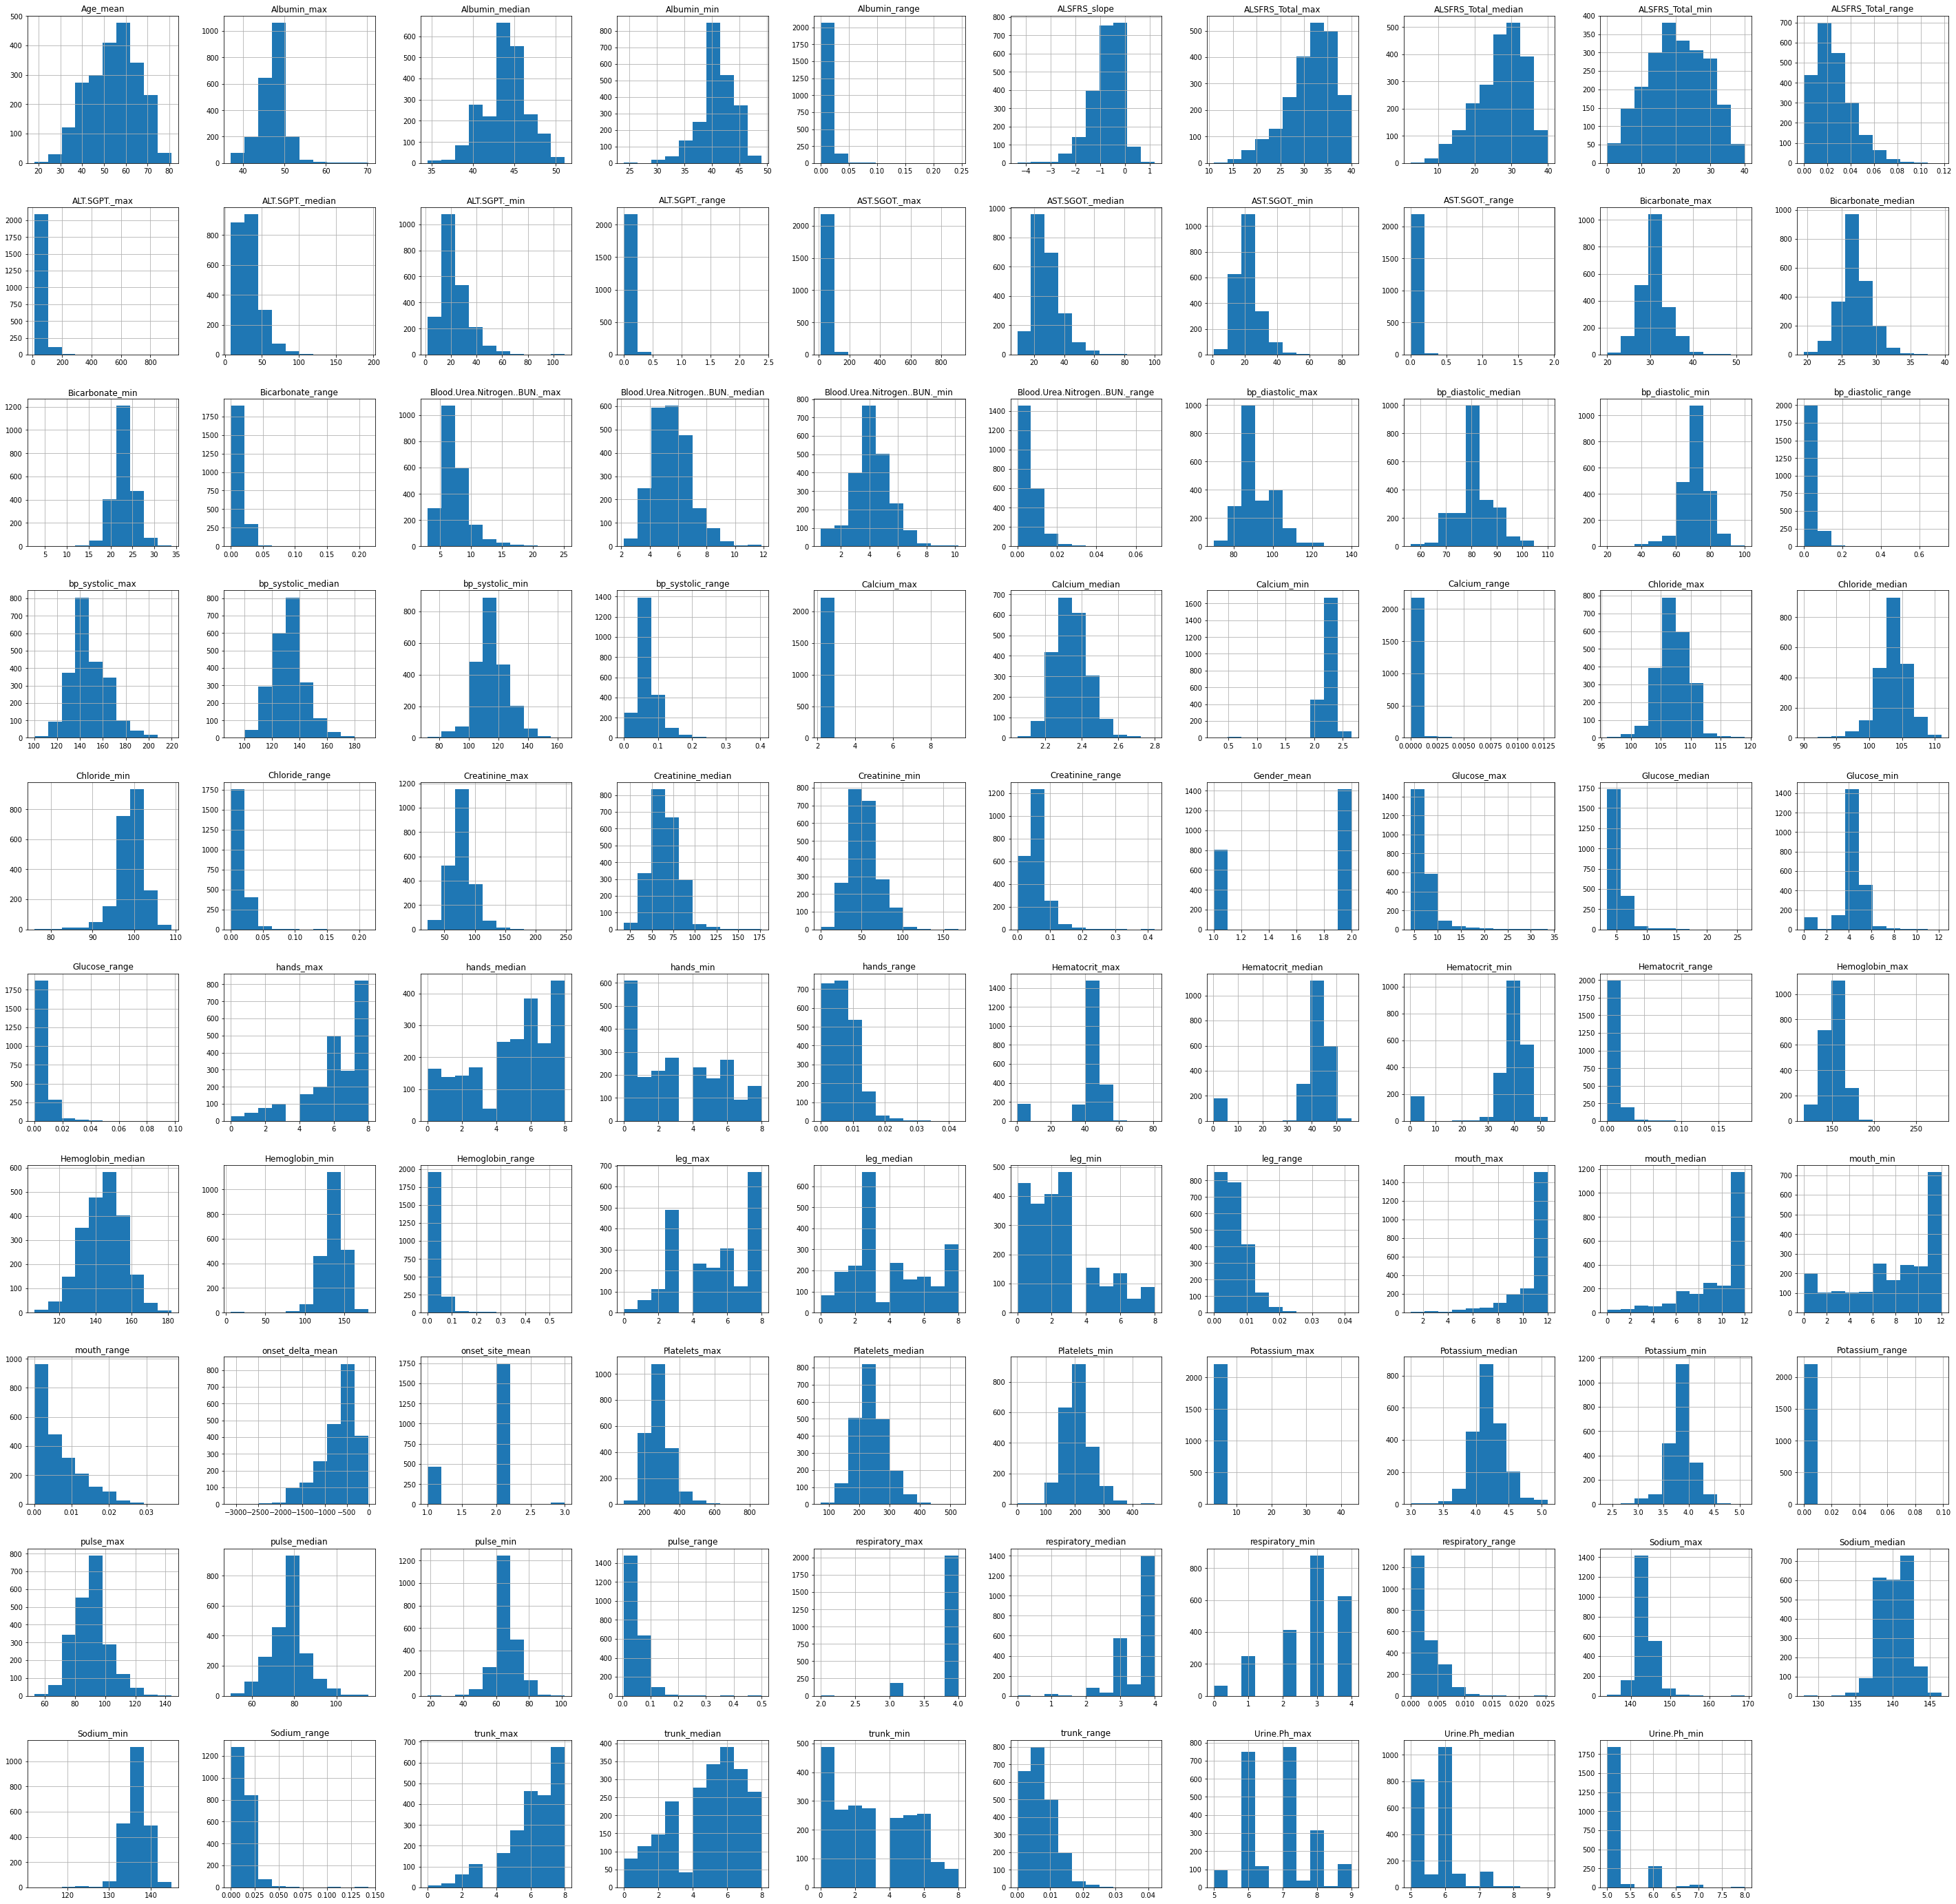

In [ ]:
train_model=train_df.drop(labels=['ID','SubjectID'],axis=1)
hist1=train_model.hist(figsize=(50,50))

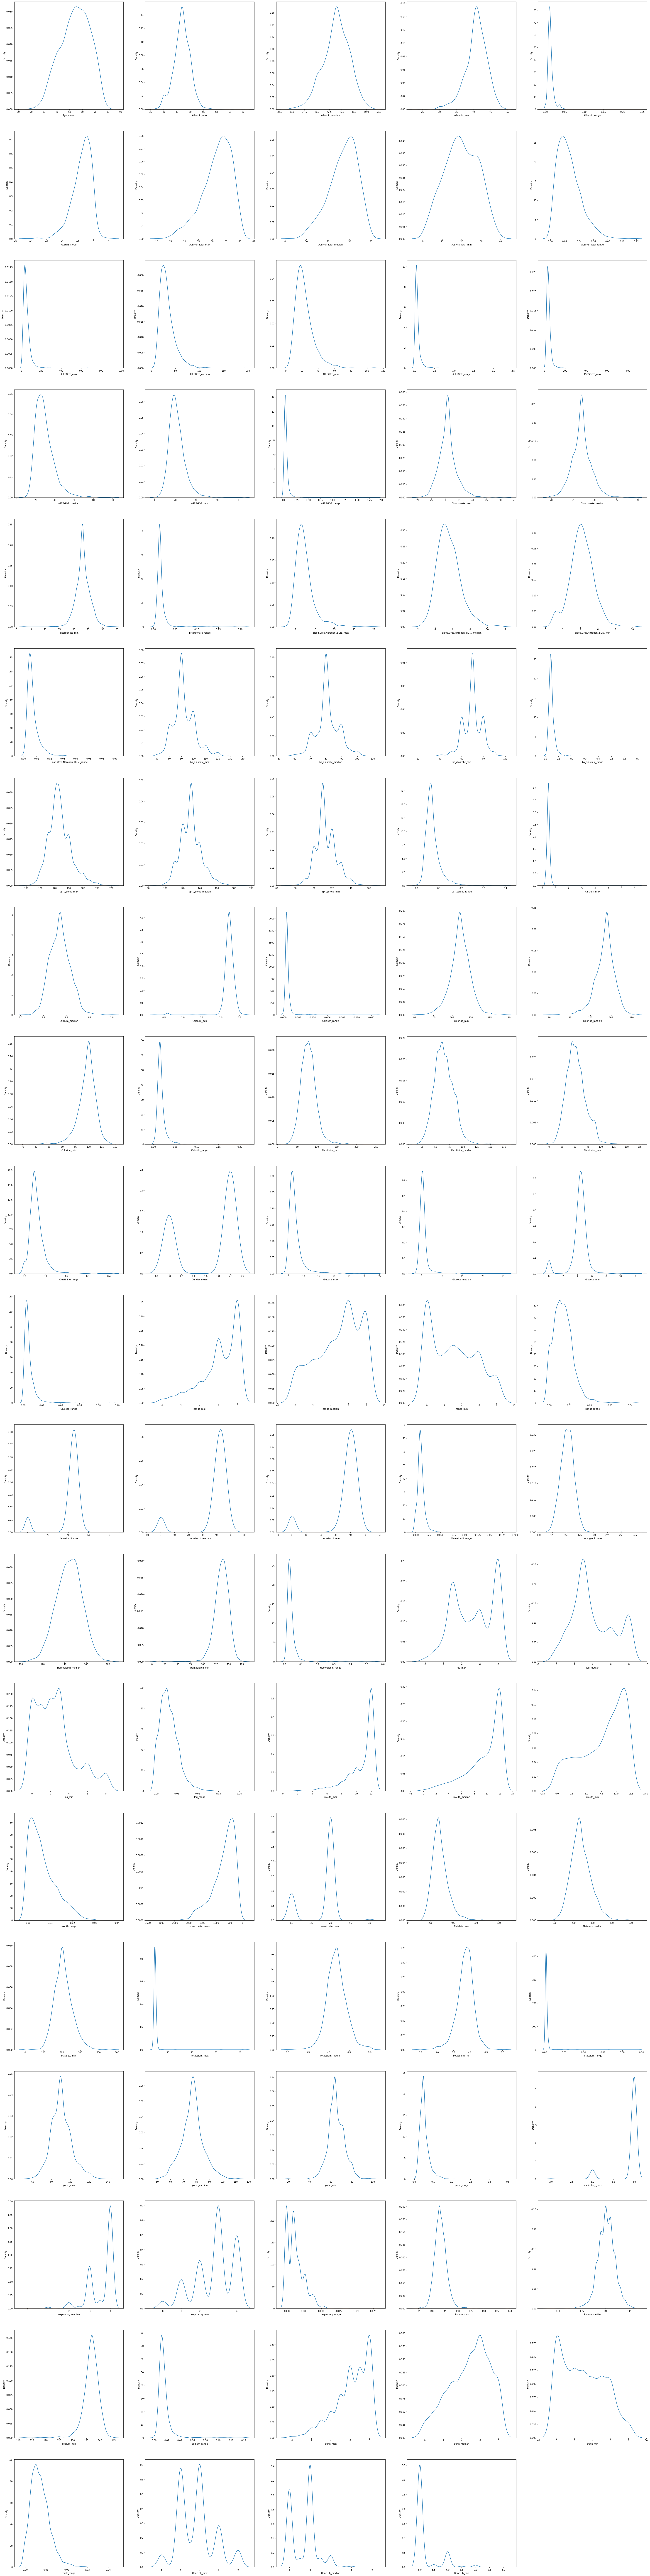

In [ ]:
plt.figure(figsize=(50,250))
for ele, column in enumerate (train_model.columns):
  if train_model[column].dtype!='object':
    ax=plt.subplot(24,5,ele+1)
    sns.kdeplot(train_model[column],ax=ax)
    plt.xlabel(column)
plt.show()

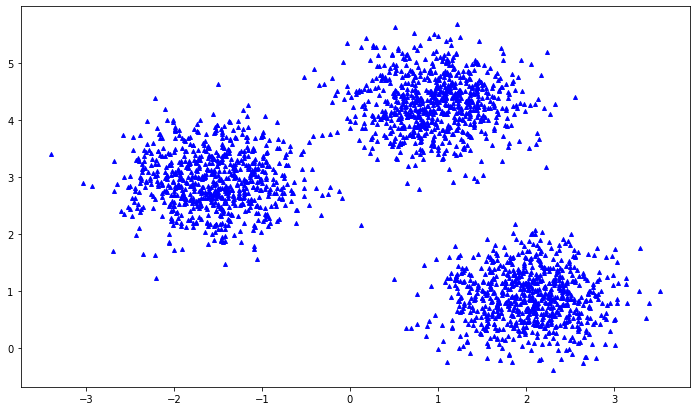

In [ ]:
plt.figure(figsize=(12,7))
pca=PCA(n_components=0.95)
X_train=pca.fit_transform(train_model)
X,Y=make_blobs(n_samples=2223,centers=3,cluster_std=0.5,random_state=0)
plt,plt.scatter(X[:,0],X[:,1],s=15,marker='^',color='b')

plt.show()

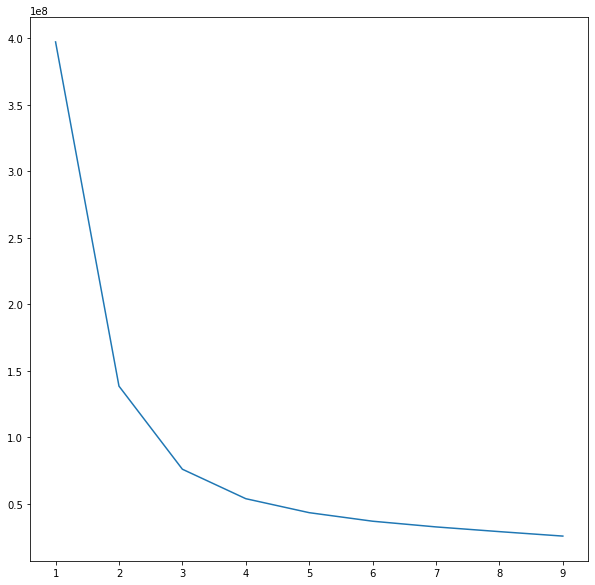

In [ ]:
model_kmean=[KMeans(n_clusters=k,random_state=25).fit(X_train) for k in range(1,10)]
inertia=[model.inertia_ for model in model_kmean]
fig,ax=plt.subplots(figsize=(10,10))
plt.plot(range(1,10), inertia)
plt.show()


for k=3

In [ ]:
kmean=KMeans(n_clusters=3)
kmean.fit(X_train)


KMeans(n_clusters=3)

In [ ]:
Y_pred=kmean.predict(X_train)
Y_pred

array([2, 1, 0, ..., 0, 1, 1], dtype=int32)

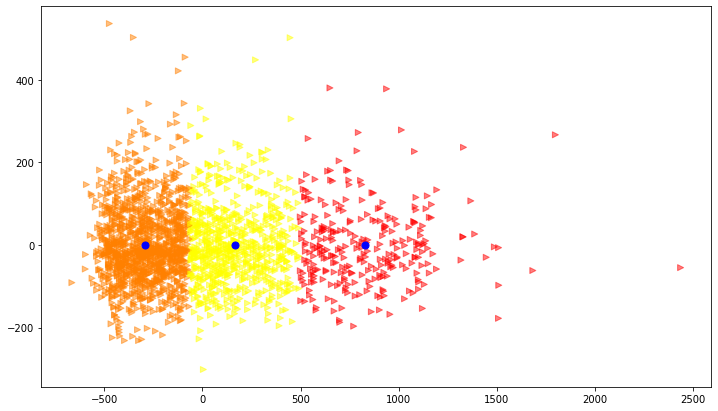

In [ ]:
plt.figure(figsize=(12,7))
plt.scatter(X_train[:,0],X_train[:,1],c=Y_pred,cmap='autumn',marker='>',alpha=0.5)
mid=kmean.cluster_centers_
mid
plt.scatter(mid[:,0],mid[:,1],c='b',s=50)
plt.show()

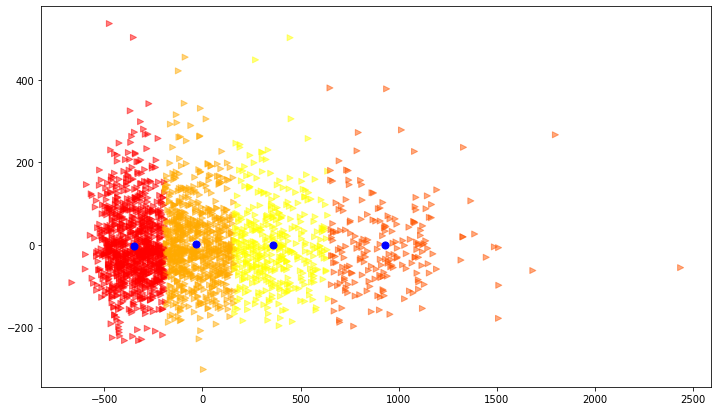

In [ ]:
kmean=KMeans(n_clusters=4)
kmean.fit(X_train)

Y_pred=kmean.predict(X_train)
Y_pred

plt.figure(figsize=(12,7))
plt.scatter(X_train[:,0],X_train[:,1],c=Y_pred,cmap='autumn',marker='>',alpha=0.5)
mid=kmean.cluster_centers_
mid
plt.scatter(mid[:,0],mid[:,1],c='b',s=50)
plt.show()

for k-5

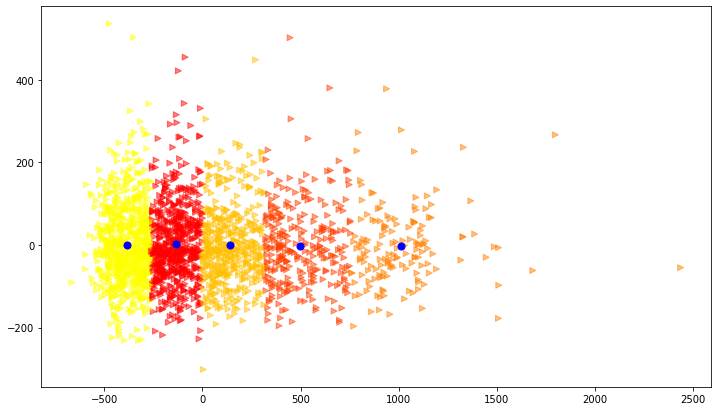

In [ ]:
kmean=KMeans(n_clusters=5)
kmean.fit(X_train)

Y_pred=kmean.predict(X_train)
Y_pred

plt.figure(figsize=(12,7))
plt.scatter(X_train[:,0],X_train[:,1],c=Y_pred,cmap='autumn',marker='>',alpha=0.5)
mid=kmean.cluster_centers_
mid
plt.scatter(mid[:,0],mid[:,1],c='b',s=50)
plt.show()

for k=2

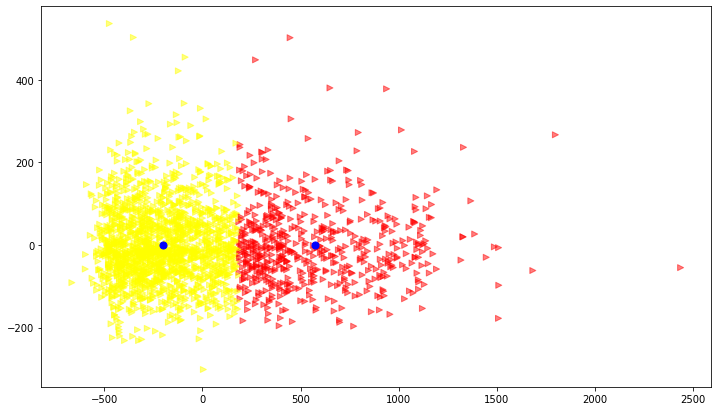

In [ ]:
kmean=KMeans(n_clusters=2)
kmean.fit(X_train)

Y_pred=kmean.predict(X_train)
Y_pred

plt.figure(figsize=(12,7))
plt.scatter(X_train[:,0],X_train[:,1],c=Y_pred,cmap='autumn',marker='>',alpha=0.5)
mid=kmean.cluster_centers_
mid
plt.scatter(mid[:,0],mid[:,1],c='b',s=50)
plt.show()

In [ ]:
from sklearn.metrics import silhouette_score
kmean=KMeans(n_clusters=3,random_state=25)
kmean.fit(X_train)
silhouette_score(X_train,kmean.labels_)

0.5116391326310278

In [ ]:
from sklearn.metrics import silhouette_score
kmean=KMeans(n_clusters=5,random_state=25)
kmean.fit(X_train)
silhouette_score(X_train,kmean.labels_)

0.3989742236355054

In [ ]:
from sklearn.metrics import silhouette_score
kmean=KMeans(n_clusters=4,random_state=25)
kmean.fit(X_train)
silhouette_score(X_train,kmean.labels_)

0.44301790894551496

In [ ]:
from sklearn.metrics import silhouette_score
kmean=KMeans(n_clusters=2,random_state=25)
kmean.fit(X_train)
silhouette_score(X_train,kmean.labels_)

0.5953588151314846